# 3.  Perceptron Training Algorithm

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

In [12]:
w0 = np.random.uniform(-1/4, 1/4)
w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)
original_omega = [w0, w1, w2]
print('The original weights: ', original_omega)

The original weights:  [0.15636076046541308, -0.5628244658777808, 0.8699679408176755]


In [13]:
S = 2 * np.random.rand(100,2) - 1
S0 = []
S1 = []
for i in S:
    if (1*w0)+(i[0]*w1)+(i[1]*w2) >= 0:
            S1.append([i[0]] + [i[1]] + [0])
    elif (i[0]*w1)+(i[1]*w2) < 0:
            S0.append([i[0]] + [i[1]] + [1])
dataset = S0 + S1

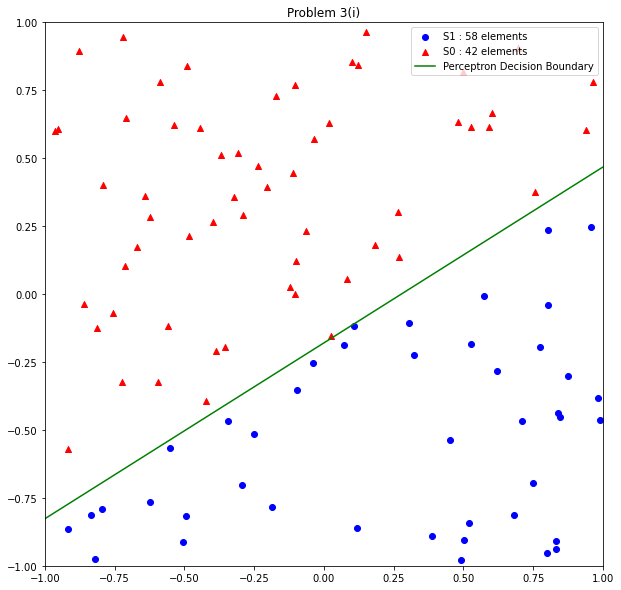

In [14]:
x1 = -(w0-w2)/w1
x2 = -(w0+w2)/w1
X = np.array([x1, x2])
Y = np.array([-1.0, +1.0])

S1_x = []
S1_y = []
S0_x = []
S0_y = []

for i in S0:
    S0_x.append(i[0])
    S0_y.append(i[1])
for i in S1:
    S1_x.append(i[0])
    S1_y.append(i[1])

fig, ax = plt.subplots(figsize=(10,10))
blue = plt.scatter(S0_x, S0_y, c ='b', label='S1 : {} elements'.format(len(S1_x)))
red = plt.scatter(S1_x, S1_y, c='r', marker = "^", label='S0 : {} elements'.format(len(S0_x)))
line = ax.plot(X, Y, c = 'green', label='Perceptron Decision Boundary')
plt.title('Problem 3(i)')
plt.legend(loc="upper right")
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.show()

In [15]:
def activation_fn(x):
    if x >= 0:
        y = 1
    else:
        y = 0
    return y

In [16]:
w0_1 = np.random.uniform(-1, 1)
w1_1 = np.random.uniform(-1, 1)
w2_1 = np.random.uniform(-1, 1)

omega = []
omega = [w0_1, w1_1, w2_1]

def misclassified(dataset, omega):
    misclassifications = 0
    for each in dataset:
        y = (omega[0]+(each[0]*omega[1])+(each[1]*omega[2]))
        y = activation_fn(y)
        if y != each[2]:
            misclassifications += 1
    return misclassifications
a = misclassified(dataset, omega)
print ('Number of Misclassifications: ', a)

Number of Misclassifications:  33


In [17]:
def perceptron_training(omega):
    epoch = 0
    omegas = []
    missed = []
    while (misclassified(dataset,omega)!=0):
        missed.append(misclassified(dataset,omega))
        #print ('Number of missclassifications: ', missed[epoch])
        epoch = epoch + 1
        #print ('Epoch Number: ', epoch)
        for each in range(len(dataset)):
            y = omega[0] + (dataset[each][0]*omega[1]) + (dataset[each][1]*omega[2])
            y = activation_fn(y)
            updated_input =[1]+dataset[each][0:2]
            desired_output = dataset[each][2]
            difference = desired_output-y
            if difference != 0:
                updated_input[0]= updated_input[0]*learning_rate*difference
                updated_input[1]= updated_input[1]*learning_rate*difference
                updated_input[2]= updated_input[2]*learning_rate*difference
                omega[0] = omega[0]+updated_input[0]
                omega[1] = omega[1]+updated_input[1]
                omega[2] = omega[2]+updated_input[2]
        #print ('Updated weights: ', omega)
        omegas.append(omega)
    final_misclassification = misclassified(dataset,omega)
    #print ('Number of missclassifications: ', final_misclassification)
    print ('Final weights: ', omegas[-1])
    return omegas, missed

Initial weights:  [0.2067337835966574, 0.4080700307992686, -0.21384803155686982]
Final weights:  [-0.7932662164033426, 2.422738248686466, -4.593439597389446]


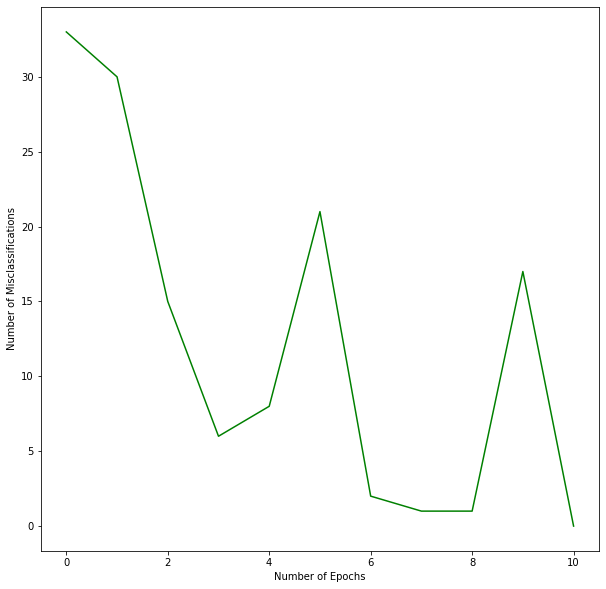

In [21]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 1
print ('Initial weights: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

Initial weights:  [0.2067337835966574, 0.4080700307992686, -0.21384803155686982]
Final weights:  [-19.793266216403342, 71.2590729136107, -105.58389495110588]


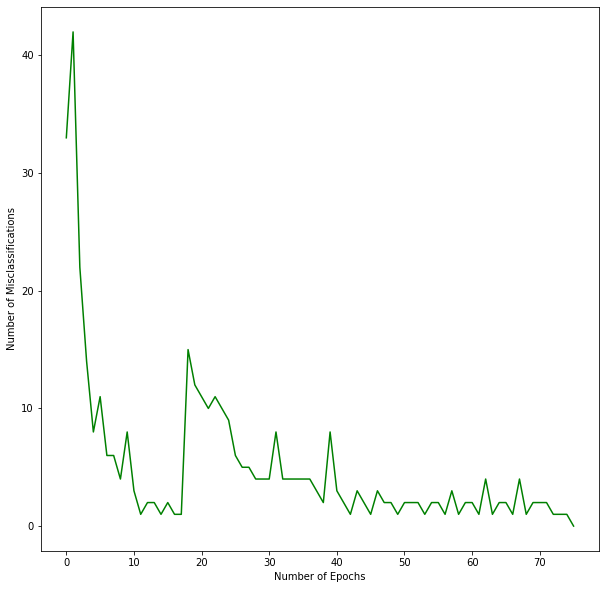

In [22]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 10
print ('Initial weights: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

Initial weights:  [0.2067337835966574, 0.4080700307992686, -0.21384803155686982]
Final weights:  [-0.09326621640334262, 0.35367061530887023, -0.5112527178904456]


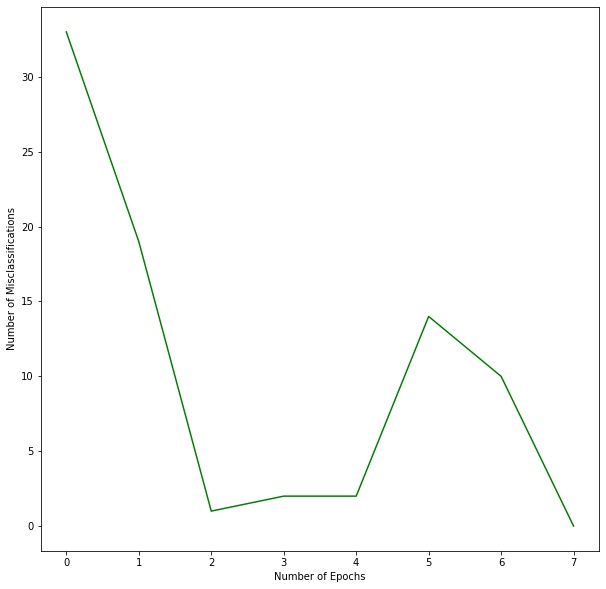

In [23]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 0.1
print ('Initial weights: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

In [25]:
w0 = np.random.uniform(-1/4, 1/4)
w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)
original_omega = [w0, w1, w2]
print('The original weights: ', original_omega)

The original weights:  [0.22732935725982367, -0.4705535540479786, -0.5106884031571821]


In [26]:
S = 2 * np.random.rand(1000,2) - 1
S0 = []
S1 = []
for i in S:
    if (1*w0)+(i[0]*w1)+(i[1]*w2) >= 0:
            S1.append([i[0]] + [i[1]] + [0])
    elif (i[0]*w1)+(i[1]*w2) < 0:
            S0.append([i[0]] + [i[1]] + [1])
dataset = S0 + S1

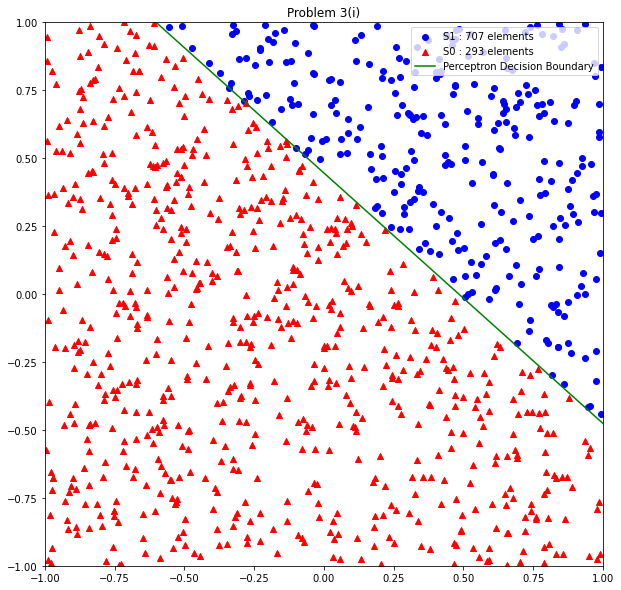

In [28]:
x1 = -(w0-w2)/w1
x2 = -(w0+w2)/w1
X = np.array([x1, x2])
Y = np.array([-1.0, +1.0])

S1_x = []
S1_y = []
S0_x = []
S0_y = []

for i in S0:
    S0_x.append(i[0])
    S0_y.append(i[1])
for i in S1:
    S1_x.append(i[0])
    S1_y.append(i[1])

fig, ax = plt.subplots(figsize=(10,10))
blue = plt.scatter(S0_x, S0_y, c ='b', label='S1 : {} elements'.format(len(S1_x)))
red = plt.scatter(S1_x, S1_y, c='r', marker = "^", label='S0 : {} elements'.format(len(S0_x)))
line = ax.plot(X, Y, c = 'green', label='Perceptron Decision Boundary')
plt.title('Problem 3(i)')
plt.legend(loc="upper right")
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.show()

In [29]:
w0_1 = np.random.uniform(-1, 1)
w1_1 = np.random.uniform(-1, 1)
w2_1 = np.random.uniform(-1, 1)

omega = []
omega = [w0_1, w1_1, w2_1]

def misclassified(dataset, omega):
    misclassifications = 0
    for each in dataset:
        y = (omega[0]+(each[0]*omega[1])+(each[1]*omega[2]))
        y = activation_fn(y)
        if y != each[2]:
            misclassifications += 1
    return misclassifications
a = misclassified(dataset, omega)
print ('Number of Misclassifications: ', a)

Number of Misclassifications:  297


Initial weights:  [-0.5460449965387395, -0.5451516075852416, -0.015126345775905214]
Final weights:  [-8.54604499653874, 17.758055271159872, 19.242021768077905]


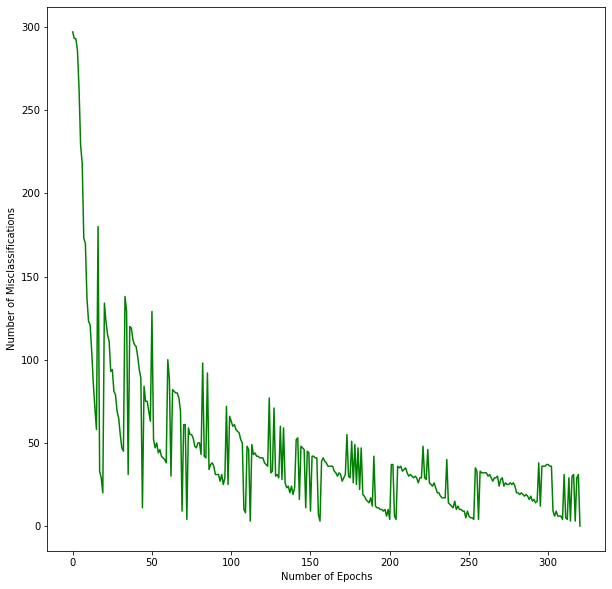

In [30]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 1
print ('Initial weights: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

Initial weights:  [-0.5195788536620147, 0.4257771897297884, 0.9669935650575001]
Final weights:  [-70.51957885366201, 90.01243261623816, -48.24890819365177]


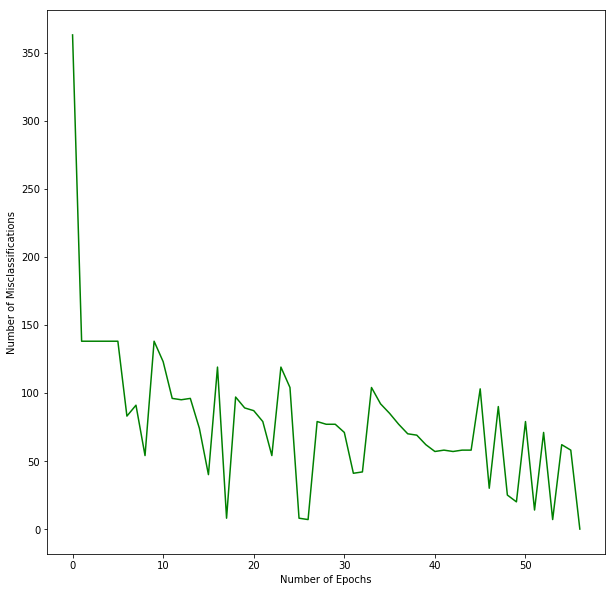

In [84]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 10
print ('Initial weights: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

Initial weights:  [-0.5195788536620147, 0.4257771897297884, 0.9669935650575001]
Final weights:  [-1.219578853662015, 1.5652391780771504, -0.8326001059339606]


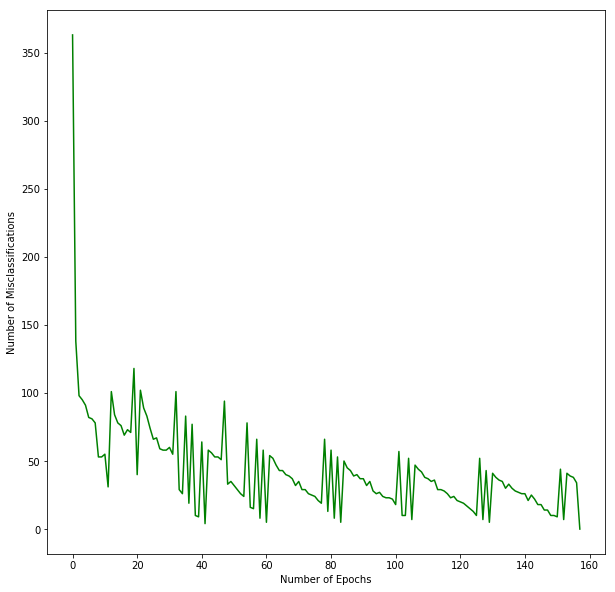

In [85]:
omega = [w0_1, w1_1, w2_1]
learning_rate = 0.1
print ('Initial weights: ' , omega)
omegas=[]
omegas, missed = perceptron_training(omega)
n_epochs = range(len(omegas)+1)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(n_epochs, missed+[0], c = 'green')
plt.ylabel('Number of Misclassifications')
plt.xlabel('Number of Epochs')
plt.show()

<b> (n) Generally, if the learning rate is too large, you can accidentally step over the optimum and end up oscillating. If the learning rate is too small, it will take way too long to get to the optimum. For a well-chosen learning rate, you can show that perceptron training algorithm will approach the optimal value at a fast rate. The notion of convergence here is that the objective value converges to the true minimum. <b>

<b> (o) As shown in the lecture notes, the perceptron training algorithm must always converge for all positive learning rates. Nevertheless, if the input classes are linearly separable, then the PTA converges for any η > 0 (and
thus results in a weight vector that can separate the two classes). This convergence property would give us the exact same results of final weights everytime. <b>

<b> (p) As expected the number of epochs required for convergence increases as the size of the dataset increases. You can also see the inference about the number of epochs and learning rate holds in this case as well. <b>